# Gege Mayrendra

## Data Science Hck-04

# Working Area

## Problem Statement

`Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.`

## Objective

- what is the gender ratio to default payment next month?
- what is the average age of the customer?
- how high is the level of education of the customer?

### Query

`SELECT limit_balance, 
cast(sex as int) as sex, 
cast(education_level as integer) as education_level, 
cast(marital_status as integer) as marital_status, 
age, 
pay_0, 
pay_2, 
pay_3, 
pay_4, 
cast(pay_5 as float64) as pay_5, 
cast(pay_6 as float64)pay_6, 
bill_amt_1, 
bill_amt_2, 
bill_amt_3, 
bill_amt_4, 
bill_amt_5, 
bill_amt_6, 
pay_amt_1, 
pay_amt_2, 
pay_amt_3, 
pay_amt_4, 
pay_amt_5, 
pay_amt_6, 
cast(default_payment_next_month as integer)default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 7992`

### Import Libraries
`Importing data that we use during our project along with the library`

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from phik.report import plot_correlation_matrix

import joblib
import json

import warnings
warnings.filterwarnings(action='ignore')


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Loading

`we import our csv and inspect the characteristic from the dataset before we explore more`

`first of all, we need to reading our dataset and assigning into df variable, at this moment we also using function to separate the possibility missing value in dataset`

In [484]:
df = pd.read_csv('h8dsft_P1M1_Gegecsv.csv',na_values=[' ', '-', '?' ,'n/a', 'na', '--'])

`setting up the the display into showing all the columns`

In [485]:
pd.set_option('display.max_columns', None)

`calling the dataframe`

In [486]:
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


`we need to know how many rows and columns in this dataset using .shape`

In [487]:
df.shape

(2965, 24)

`the dataset quite small, we might to explore is this dataset has a duplicated rows using .duplicated`

In [488]:
df[df.duplicated()].shape

(1, 24)

`only one row duplicated, we will handle it in data cleaning section, now we use df.info to know the dataset in general`

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

`from df.info we now know this dataset has 20 dtype float64 and 4 dtype int64 and for the next dataset exploration we showing the head, tail and sample`

In [490]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [491]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,12878.0,7702.0,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-100.0,100.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,96.0,780.0,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [492]:
df.sample(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1285,360000.0,1,3,2,41.0,2.0,-1.0,0.0,0.0,0.0,0.0,218.0,7022.0,9744.0,89215.0,98256.0,99145.0,7022.0,3001.0,80000.0,10500.0,5000.0,10000.0,0
998,20000.0,2,2,1,34.0,0.0,0.0,0.0,-1.0,0.0,-1.0,17625.0,14841.0,492.0,23150.0,17883.0,7729.0,1019.0,990.0,23965.0,371.0,7738.0,3638.0,0
2393,140000.0,2,2,1,35.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4694.0,4340.0,4332.0,4058.0,2929.0,4345.0,4340.0,4332.0,4172.0,5544.0,4345.0,2178.0,1
1264,50000.0,1,3,1,47.0,0.0,0.0,0.0,2.0,0.0,0.0,11752.0,13244.0,14722.0,15181.0,15928.0,16671.0,2000.0,2000.0,1000.0,1000.0,1000.0,1000.0,0
1311,310000.0,2,3,2,30.0,1.0,-1.0,0.0,0.0,0.0,0.0,5931.0,118109.0,131107.0,97009.0,51757.0,50009.0,120000.0,18008.0,20000.0,12000.0,5000.0,3000.0,0
1933,30000.0,2,3,2,59.0,2.0,2.0,2.0,2.0,2.0,2.0,21767.0,24764.0,24031.0,25001.0,24531.0,21743.0,3363.0,0.0,1600.0,0.0,2000.0,0.0,1
2295,430000.0,2,1,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,0
1457,50000.0,1,3,1,43.0,0.0,0.0,2.0,0.0,0.0,0.0,7978.0,11396.0,8900.0,8565.0,8590.0,19894.0,3887.0,0.0,453.0,312.0,1500.0,500.0,0
2283,200000.0,2,1,2,41.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,504.0,2502.0,21699.0,2914.0,3392.0,4343.0,2502.0,21699.0,3003.0,3392.0,4343.0,326.0,0
1857,60000.0,2,2,2,26.0,2.0,2.0,2.0,2.0,2.0,0.0,56685.0,55208.0,59175.0,60218.0,55447.0,55305.0,0.0,5000.0,2511.0,6.0,3000.0,3000.0,0


`using df.describe to know mean Q1, Q2 and etc`

In [493]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


### Data Cleaning

`from the little exploration above, we know there a little of data duplicated in this dataset. this is not necessary, so we want to drop them using drop_duplicates`

In [494]:
df = df.drop_duplicates()

In [495]:
df[df.duplicated()].shape

(0, 24)

`we need to check if the dataset has been contained with missing value, so we use isnull.sum to check the dataset in general`

In [496]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

`re-checking the missing value`

In [497]:
miss_vals = {}

for i in list(df.columns):
    miss_vals[i] = 0
    for n in df[i]:
        if n in ['N/A', '--', '-', 'Null','?']:
            miss_vals[i] = miss_vals[i] + 1
miss_vals

{'limit_balance': 0,
 'sex': 0,
 'education_level': 0,
 'marital_status': 0,
 'age': 0,
 'pay_0': 0,
 'pay_2': 0,
 'pay_3': 0,
 'pay_4': 0,
 'pay_5': 0,
 'pay_6': 0,
 'bill_amt_1': 0,
 'bill_amt_2': 0,
 'bill_amt_3': 0,
 'bill_amt_4': 0,
 'bill_amt_5': 0,
 'bill_amt_6': 0,
 'pay_amt_1': 0,
 'pay_amt_2': 0,
 'pay_amt_3': 0,
 'pay_amt_4': 0,
 'pay_amt_5': 0,
 'pay_amt_6': 0,
 'default_payment_next_month': 0}

`now we believe our dataset already clean from all the missing values`

### Exploratory Data Analysis (EDA)

`in this section we will observe and visualize the data deeper`

- what is the gender ratio to default payment next month?

<AxesSubplot:xlabel='sex', ylabel='count'>

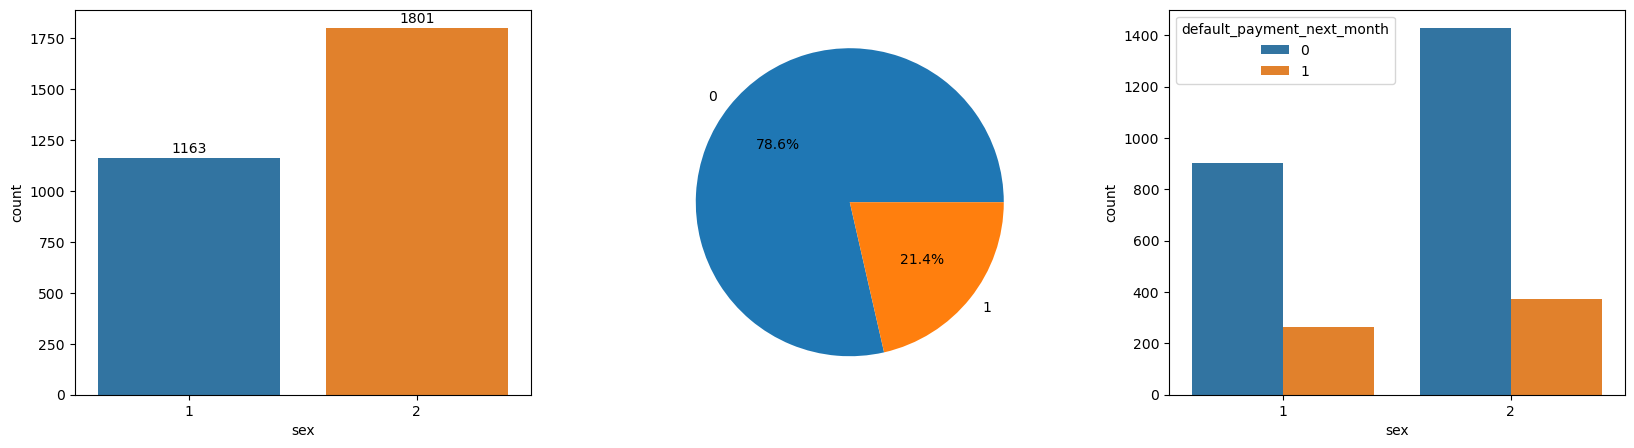

In [585]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
fig = sns.countplot(x='sex', data = df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(df.default_payment_next_month.value_counts(), labels= df.default_payment_next_month.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
sns.countplot(x='sex', hue='default_payment_next_month', data = df)

`From the three graphs above, it is clear that the sex column with labels 1 and 2 represents male and female, respectively. In this dataset, female sex accounts for 1801 data points, while male sex accounts for 1163, for a ratio of 78.6% to 21.4%. It is also clear from the countplot that, when associated with the default payment next month column, both male and female have the greatest number of labels 0 or no.`

- what is the average age of the customer?

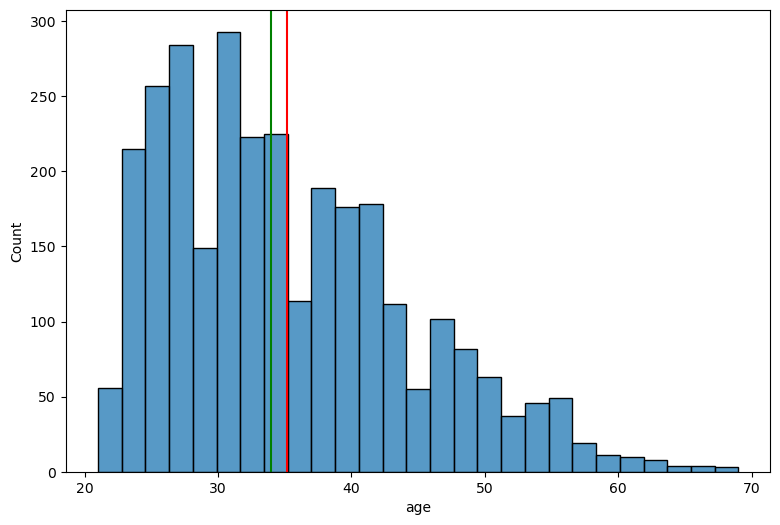

In [586]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='age', data =df)
plt.axvline(df.age.mean(), color = 'r', label = 'Mean')
plt.axvline(df.age.median(), color = 'g', label = 'Median')

`According to the histogram above, the majority of credit card users are between the ages of 20 and 30, with an average age of 35 and a median value of 34.`

- how high is the level of education of the customer?

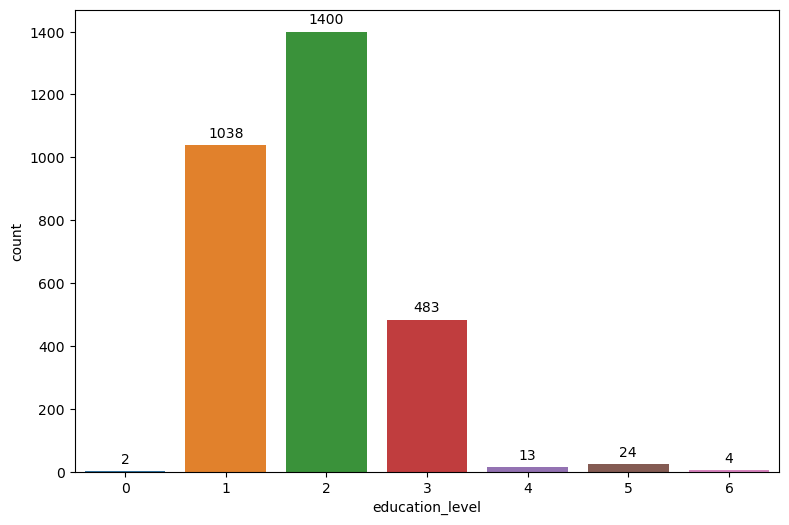

In [587]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
fig = sns.countplot(x='education_level', data = df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

`for our information is divided by 6 sections such as (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown), and from the data above, we know that most of the customer has passed university with 1400 customers and it followed by graduate high school with 1038 customer`

`after knowing our data, then we use phik.matrix to see the correlation between each columns in categorical and numerical ways`

In [499]:
df.phik_matrix().loc['default_payment_next_month'].sort_values(ascending=False)

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


default_payment_next_month    1.000000
pay_0                         0.596572
pay_2                         0.468335
pay_6                         0.386559
pay_3                         0.334726
pay_4                         0.318688
pay_5                         0.315415
limit_balance                 0.191907
bill_amt_4                    0.087360
education_level               0.085359
pay_amt_3                     0.083774
bill_amt_1                    0.073974
bill_amt_3                    0.073073
age                           0.067038
bill_amt_2                    0.064086
pay_amt_4                     0.062588
pay_amt_1                     0.046866
pay_amt_5                     0.022282
marital_status                0.020055
bill_amt_5                    0.019495
sex                           0.015281
pay_amt_2                     0.004992
bill_amt_6                    0.000000
pay_amt_6                     0.000000
Name: default_payment_next_month, dtype: float64

`from phik.matrix, we can see the most affecting columns to price, i personally have a standard to process the columns who has value more than 0.1 so i choose to pick default payment next month, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, limit_balance type as my features`

In [500]:
df_fix = df[['default_payment_next_month','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','limit_balance']]

In [501]:
df_fix

,default_payment_next_month,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,1,0.0,0.0,0.0,0.0,0.0,0.0,80000.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,200000.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,20000.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,260000.0
4,0,0.0,0.0,0.0,-1.0,0.0,0.0,150000.0
...,...,...,...,...,...,...,...,...
2960,0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,80000.0
2961,1,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,50000.0
2962,1,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,450000.0
2963,0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,50000.0


`visualize the correlation of selected features using phix correlation matrix`

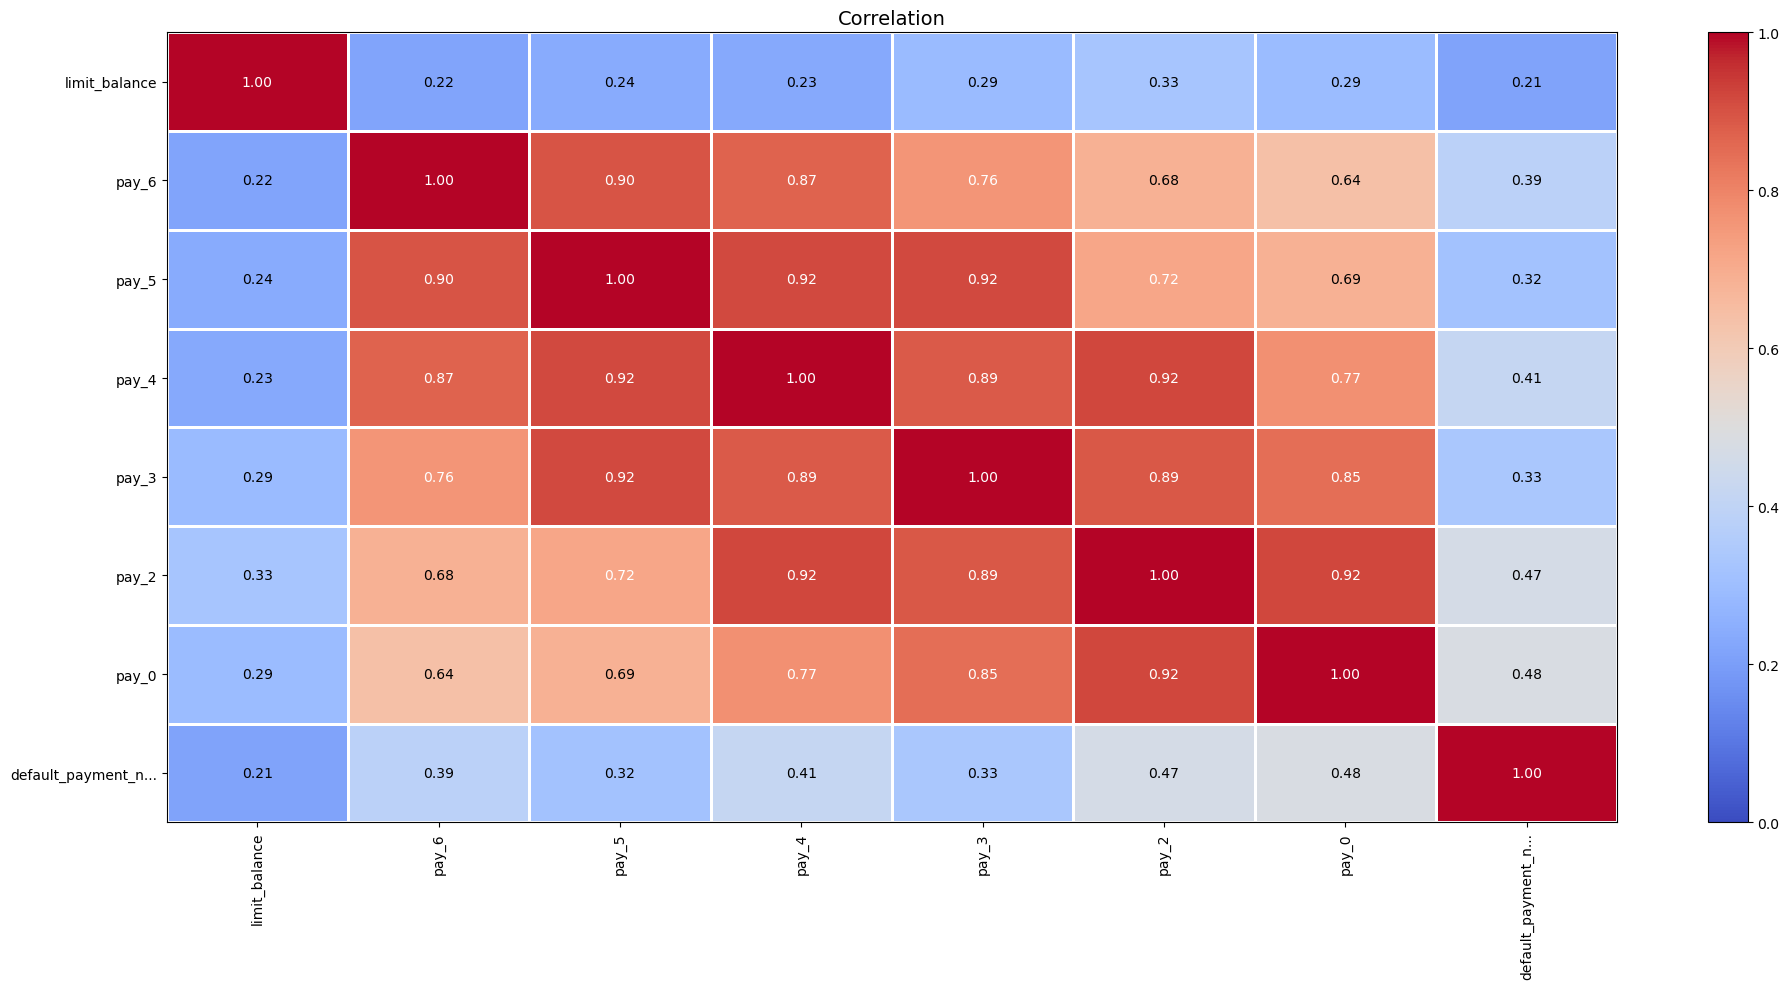

In [505]:
phik_corr = df_fix.phik_matrix(interval_cols='default_payment_next_month')

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='coolwarm',
                        title=r'Correlation', 
                        figsize=(20,10))
plt.show()

`now we need to know each unique value to every columns, as we need to check the multicollinearity`

In [593]:
df_fix.nunique()

default_payment_next_month     2
pay_0                         11
pay_2                         10
pay_3                          9
pay_4                         10
pay_5                          9
pay_6                          8
limit_balance                 59
dtype: int64

In [588]:
# VIF Calculator
def vif(c):
    vif = pd.DataFrame()
    vif['Column'] = c.columns
    vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]

    return vif

In [591]:
#search for multicolinearity
vif(df_fix[['limit_balance','pay_0', 'pay_2', 'pay_3', 'pay_4','pay_5', 'pay_6']])

,Column,VIF
0,limit_balance,1.123239
1,pay_0,1.850244
2,pay_2,3.131830
3,pay_3,3.401713
4,pay_4,4.080875
5,pay_5,4.811418
6,pay_6,3.210091


`based on vif value, now we confident with our features to next processing`

### Feature Engineering

`we do split and train our data in this section`

`first we split our data into train, validation and test`

In [506]:
df_train_val, df_test = train_test_split(df_fix, test_size=0.1, random_state=27, stratify=df_fix.default_payment_next_month)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=27, stratify=df_train_val.default_payment_next_month)

`we split the dataset into 3 categories and has 3 propotion for each of them`

In [507]:
print(f'df_train proportion: {len(df_train) / len(df_fix):.1f}')
print(f'df_val proportion: {len(df_val) / len(df_fix):.1f}')
print(f'df_test proportion: {len(df_test) / len(df_fix):.1f}')

df_train proportion: 0.7
df_val proportion: 0.2
df_test proportion: 0.1


`i personally choose 0.7 to train because the bigger the data has learn, the expectation of implementation in validation and test is pretty high`

`calling the df train dataframe`

In [509]:
df_train

,default_payment_next_month,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
437,0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0
1467,0,0.0,0.0,2.0,0.0,0.0,0.0,20000.0
1572,0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,400000.0
599,0,0.0,0.0,0.0,0.0,0.0,0.0,420000.0
1317,0,-1.0,-1.0,0.0,0.0,0.0,0.0,200000.0
...,...,...,...,...,...,...,...,...
2191,0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,360000.0
626,0,0.0,0.0,0.0,0.0,0.0,0.0,240000.0
558,0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0
1751,1,0.0,0.0,0.0,2.0,2.0,0.0,50000.0


`checking the outliers of all the features`

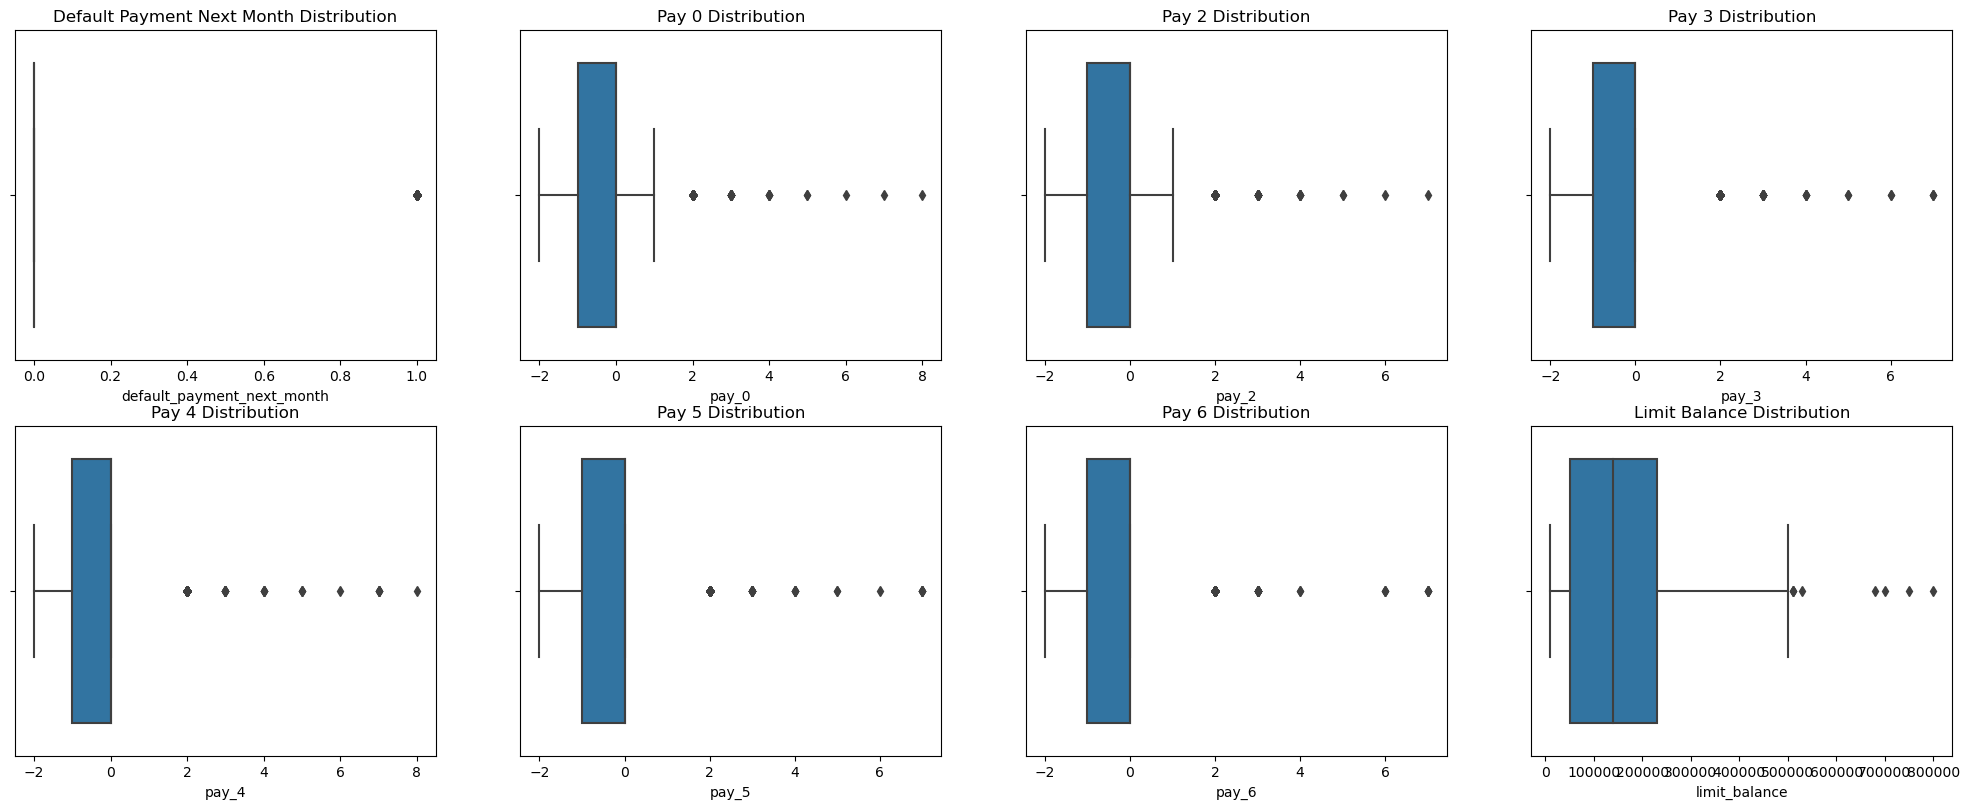

In [510]:
plt.figure(figsize=(25, 30))
for col in df_train.columns:
    plt.subplot(6, 4, df_fix.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=df_train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

In [511]:
# outliers detection
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75) + 3 * IQR
    lower_limit = df[col].quantile(0.25) - 3 * IQR
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)]

In [512]:
# Check Outliers
cols = df_train.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(df_train, cols[i]).shape[0] / df_train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,default_payment_next_month,21.43
1,pay_0,0.47
2,pay_2,0.47
3,pay_3,0.56
4,pay_4,0.70
5,pay_5,0.70
6,pay_6,0.47
7,limit_balance,0.05


`we decided to handle limit balance outliers, first we need to check the skew`

In [513]:
df_train['limit_balance'].skew()

0.9759119310369871

`from the limit balance skew as big as 0.9, we know this distribution is right skew and we need to handle it using Tukeys`

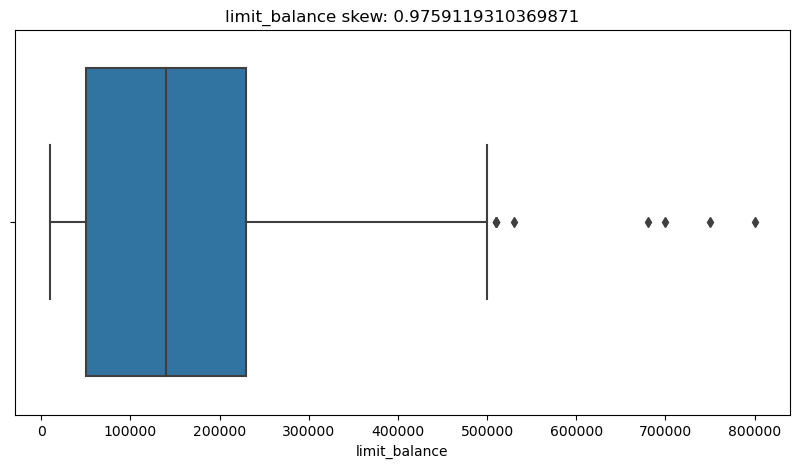

In [514]:
cols_to_plot = ['limit_balance']
fig, ax = plt.subplots(ncols=1, figsize=[10, 5])
for idx, col in enumerate(cols_to_plot):
    sns.boxplot(df_train[col], ax=ax)
    ax.set_title(f'{col} skew: {df_train[col].skew()}')
plt.show()


In [515]:
# outlier detection using IQR 
Q3 = df_train['limit_balance'].quantile(.75)
Q1 = df_train['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_train[(df_train['limit_balance'] > upper) | (df_train['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_train.shape[0] * 100, '%')

count of outlier:  8
percentage of outlier:  0.3750586029067042 %


`making the cleaned dataframe from outliers into new variable`

In [516]:
df_train_cleaned = df_train[~(df_train['limit_balance'] > upper) | (df_train['limit_balance'] < lower)]

`comparing the old and new dataframe to see the differences after handling the outliers`

In [594]:
numcol = ['limit_balance']
print('before handling: \n', df_train[numcol].describe())

print('after handling: \n', df_train_cleaned[numcol].describe())

before handling: 
        limit_balance
count    2133.000000
mean   164167.838725
std    124746.361645
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    800000.000000
after handling: 
        limit_balance
count    2125.000000
mean   162437.647059
std    121544.077604
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    500000.000000


### Model Definition

`splitting the features and target`

In [531]:
# Feature & Target selection
X_train = df_train_cleaned.drop(columns=['default_payment_next_month']) # Features
y_train = df_train_cleaned['default_payment_next_month'] # Target

X_val = df_val.drop(columns=['default_payment_next_month']) # Features
y_val = df_val['default_payment_next_month'] # Target

`Linear Regression, Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbors, Naive Bayes, and Gradient Boosting are some of the classification methods used in this section to develop models and scale data using a pipeline created with StandardScaler.`

In [532]:
# Logistic Regression Pipeline
pipe_lin_reg = Pipeline([('scaling', StandardScaler()),
                         ('classifier', LogisticRegression(random_state=24))])
# Support Vector Machine Pipeline
pipe_SVC = Pipeline([('scaling', StandardScaler()),
                     ('classifier', SVC(random_state=24))])
# Decision Tree Pipeline
pipe_tree = Pipeline([('scaling', StandardScaler()),
                     ('classifier', DecisionTreeClassifier(random_state=24))])
# Random Forest Pipeline
pipe_rf = Pipeline([('scaling', StandardScaler()),
                    ('classifier', RandomForestClassifier(random_state=24))])
# K-Nearest Neighbors Pipeline
pipe_knn = Pipeline([('scaling', StandardScaler()),
                     ('classifier', KNeighborsClassifier())])
# Naive Bayes Pipeline
pipe_bayes = Pipeline([('scaling', StandardScaler()),
                     ('classifier', GaussianNB())])
# Gradient Boosting Pipeline
pipe_gboost = Pipeline([('scaling', StandardScaler()),
                        ('classifier', GradientBoostingClassifier(random_state=24))])

### Model Training

`fitting the model into our splitting data`

In [533]:
# Model Trainng 
pipe_lin_reg.fit(X_train, y_train)
pipe_SVC.fit(X_train, y_train)
pipe_tree.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_bayes.fit(X_train, y_train)
pipe_gboost.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('classifier', GradientBoostingClassifier(random_state=24))])

`evaluate the model perform for each model and focused on recall columns and accuracy columns to analyse if the model is a goodfit or not`

In [595]:
# Classification report 
print('Classification Report Linear Regression')
print(classification_report(y_train, pipe_lin_reg.predict(X_train)))
print(classification_report(y_val, pipe_lin_reg.predict(X_val)))

Classification Report Linear Regression
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1668
           1       0.75      0.29      0.42       457

    accuracy                           0.83      2125
   macro avg       0.79      0.63      0.66      2125
weighted avg       0.82      0.83      0.79      2125

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       420
           1       0.72      0.32      0.44       114

    accuracy                           0.83       534
   macro avg       0.78      0.64      0.67       534
weighted avg       0.81      0.83      0.80       534



`from linear regression we got 0.83 accuracy in training and 0.83 in validation so we can say this model is a good fit but the recall is only 0.29`

In [535]:
print('Classification Report Support Vector Machine')
print(classification_report(y_train, pipe_SVC.predict(X_train)))
print(classification_report(y_val, pipe_SVC.predict(X_val)))

Classification Report Support Vector Machine
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1668
           1       0.74      0.42      0.54       457

    accuracy                           0.84      2125
   macro avg       0.80      0.69      0.72      2125
weighted avg       0.83      0.84      0.83      2125

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       420
           1       0.72      0.43      0.54       114

    accuracy                           0.84       534
   macro avg       0.79      0.69      0.72       534
weighted avg       0.83      0.84      0.83       534



`from SVC we got 0.84 accuracy in training and 0.84 in validation so we can say this model is a good fit and the recall is  0.42`

In [536]:
print('Classification Report Decision Tree Without Hyperparameter')
print(classification_report(y_train, pipe_tree.predict(X_train)))
print(classification_report(y_val, pipe_tree.predict(X_val)))

Classification Report Decision Tree Without Hyperparameter
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1668
           1       0.95      0.64      0.77       457

    accuracy                           0.92      2125
   macro avg       0.93      0.82      0.86      2125
weighted avg       0.92      0.92      0.91      2125

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       420
           1       0.55      0.42      0.48       114

    accuracy                           0.80       534
   macro avg       0.70      0.66      0.68       534
weighted avg       0.79      0.80      0.79       534



`from Decision Tree we got 0.92 accuracy in training and 0.80 in validation so we can say this model is a over fit because the differences between train and val is too far and the recall is 0.64`

In [537]:
print('Classification Report Random Forest')
print(classification_report(y_train, pipe_rf.predict(X_train)))
print(classification_report(y_val, pipe_rf.predict(X_val)))

Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1668
           1       0.90      0.68      0.78       457

    accuracy                           0.92      2125
   macro avg       0.91      0.83      0.86      2125
weighted avg       0.91      0.92      0.91      2125

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       420
           1       0.57      0.46      0.50       114

    accuracy                           0.81       534
   macro avg       0.71      0.68      0.69       534
weighted avg       0.80      0.81      0.80       534



`from Random Forest we got 0.92 accuracy in training and 0.81 in validation so we can say this model is a over fit because the differences between train and val is too far and the recall is 0.68`

In [538]:
print('Classification Report K-Nearest Neighbors')
print(classification_report(y_train, pipe_knn.predict(X_train)))
print(classification_report(y_val, pipe_knn.predict(X_val)))

Classification Report K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1668
           1       0.73      0.47      0.57       457

    accuracy                           0.85      2125
   macro avg       0.80      0.71      0.74      2125
weighted avg       0.84      0.85      0.84      2125

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       420
           1       0.59      0.43      0.50       114

    accuracy                           0.81       534
   macro avg       0.72      0.67      0.69       534
weighted avg       0.80      0.81      0.80       534



`from K-Nearest Neighbors we got 0.85 accuracy in training and 0.81 in validation so we can say this model is a good fit and the recall is  0.47`

In [539]:
print('Classification Report Naive Bayes')
print(classification_report(y_train, pipe_bayes.predict(X_train)))
print(classification_report(y_val, pipe_bayes.predict(X_val)))

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1668
           1       0.58      0.43      0.49       457

    accuracy                           0.81      2125
   macro avg       0.72      0.67      0.69      2125
weighted avg       0.80      0.81      0.80      2125

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       420
           1       0.61      0.52      0.56       114

    accuracy                           0.83       534
   macro avg       0.74      0.71      0.73       534
weighted avg       0.82      0.83      0.82       534



`from Naive Bayes we got 0.81 accuracy in training and 0.83 in validation so we can say this model is a over fit and the recall is 0.43`

In [540]:
print('Classification Report Gradient Boosting')
print(classification_report(y_train, pipe_gboost.predict(X_train)))
print(classification_report(y_val, pipe_gboost.predict(X_val)))

Classification Report Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1668
           1       0.76      0.44      0.56       457

    accuracy                           0.85      2125
   macro avg       0.81      0.70      0.73      2125
weighted avg       0.84      0.85      0.83      2125

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       420
           1       0.66      0.45      0.53       114

    accuracy                           0.83       534
   macro avg       0.76      0.69      0.72       534
weighted avg       0.82      0.83      0.82       534



`from Gradient Boosting we got 0.85 accuracy in training and 0.83 in validation so we can say this model is a good fit and the recall is 0.44`

`after we evaluate all the the models, we decided to go with KNN model because it has a good fot between training and validation and also has a big one recall value. why we put recall value into our priorities because we avidind the chance of false negative. now we use KNN model with hyperparameter`

In [546]:
# KNN
knn_params = {'classifier__n_neighbors': [3, 5, 7, 9], 
              'classifier__weights': ['uniform', 'distance'], 
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


In [563]:
knn = GridSearchCV(pipe_knn, param_grid=knn_params, cv=5, n_jobs=-1)
knn.fit(X_train, y_train)
best_knn = knn.best_estimator_
print('K-Nearest Neighbors Best Hyperparameter')
print(knn.best_params_)


K-Nearest Neighbors Best Hyperparameter
{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}


`evaluate KNN neighbors with hyperparameter`

In [564]:
print('Classification Report K-Nearest Neighbors With Hyperparameter')
print(classification_report(y_train, best_knn.predict(X_train)))
print(classification_report(y_val, best_knn.predict(X_val)))

Classification Report K-Nearest Neighbors With Hyperparameter
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1668
           1       0.70      0.45      0.55       457

    accuracy                           0.84      2125
   macro avg       0.78      0.70      0.73      2125
weighted avg       0.83      0.84      0.83      2125

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       420
           1       0.57      0.38      0.45       114

    accuracy                           0.81       534
   macro avg       0.71      0.65      0.67       534
weighted avg       0.79      0.81      0.79       534



`with the hyperparameters in KNN model, the result is unexpected because the accuracy is goes down from 0.85 to 0.84 i training, the accuracy in validation is still the same with 0.81. the recall value is also goes down from 0.47 to 0.45`

### Confusion Matrix

`creating confusion matrix for KNN model wit or without hyperparameters`

In [565]:
confusions = [confusion_matrix(y_val, pipe_knn.predict(X_val))]
confusions2 = [confusion_matrix(y_val, best_knn.predict(X_val))]

In [596]:
matrix_label = ['KNN']

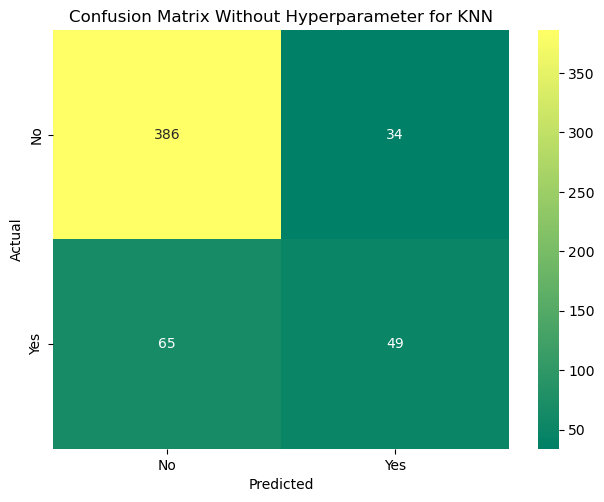

In [599]:
# ploting confusion matrix without hyperparameter
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix Without Hyperparameter for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

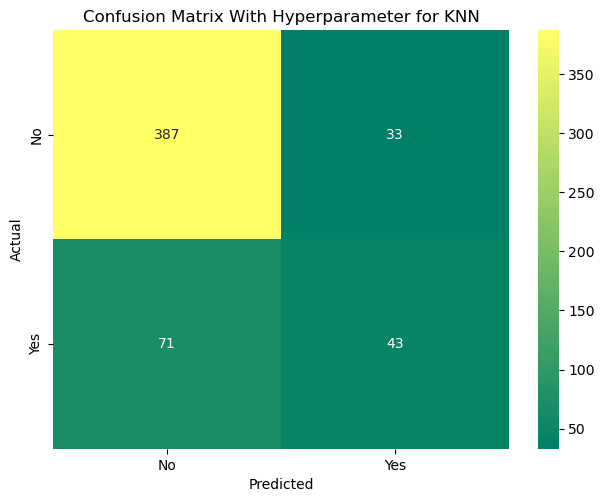

In [600]:
# ploting confusion matrix with hyperparameter
plt.figure(figsize=(25, 25))
for i in range(len(confusions2)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions2[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix With Hyperparameter for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

`with confusion matrix, i suggest to be more focused to false negative, because it is more dangerous if the customer is predicted to pay the credit then they dont, than vice versa. KNN model without hyperparameter predicts 65 customer will be false negative and KNN with hyperparameter predicts 71 customer will be false negative`

### ROC

`we use ROC to predict suitability the target of the model in KKN`

In [569]:
# Menghitung False Positive Rate dan True Positive Rate menggunakan roc_curve()
knn_fpr_val, knn_tpr_val, knn_thresholds_val = roc_curve(y_val, best_knn.predict(X_val))

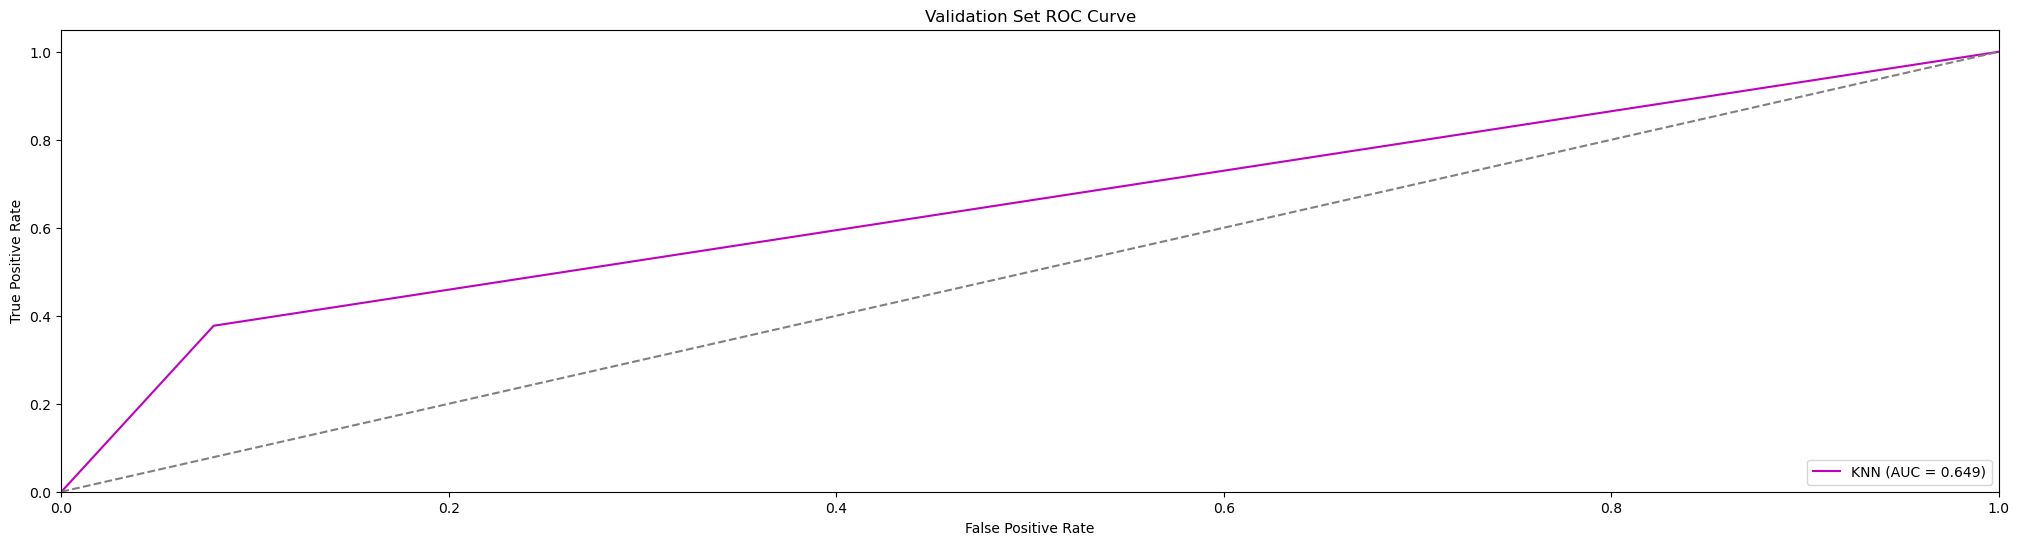

In [570]:
# Ploting roc_auc
plt.figure(figsize=(25, 6))
plt.plot(knn_fpr_val, knn_tpr_val, color='m', label=f'KNN (AUC = {roc_auc_score(y_val, best_knn.predict(X_val)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

`with ROC score is 0.64, it means that this model could predict 64% confidently of our target which is the default payment of each customer`

## Model Inference

In [574]:
df_test

,default_payment_next_month,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
2081,0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,360000.0
970,0,0.0,0.0,0.0,0.0,0.0,2.0,260000.0
2355,0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,120000.0
1443,1,1.0,2.0,2.0,2.0,0.0,0.0,50000.0
1676,0,0.0,0.0,0.0,0.0,0.0,-2.0,10000.0
...,...,...,...,...,...,...,...,...
2101,1,3.0,2.0,2.0,-1.0,-1.0,0.0,200000.0
2752,0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,270000.0
1429,1,3.0,3.0,2.0,2.0,0.0,0.0,100000.0
2924,0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,400000.0


In [575]:
# Feature selecting
X_test = df_test.drop(['default_payment_next_month'], axis=1) # Feature
y_test = df_test['default_payment_next_month'] # Target

In [576]:
pred_knn = pd.DataFrame(best_knn.predict(X_test))
pred = pd.concat([df_test['default_payment_next_month'].reset_index(drop=True), pred_knn], axis=1)
pred.columns = ['Actual', 'KNN']

pred[pred.Actual == 1].head(20)

,Actual,KNN
3,1,1
5,1,0
6,1,0
19,1,1
21,1,1
24,1,0
26,1,0
32,1,1
40,1,1
48,1,0


## Overall Analysis

`The dataset used is the credit_card_default dataset which relates to the failure of a debtor (credit card holder) to pay his credit card bill according to a predetermined schedule. Credit card default payment occurs when a debtor is unable or unwilling to pay his bills within a predetermined time, usually for several months. This can cause financial losses for banks or credit card companies, in this dataset customers who fail to pay have as much as 21.4% of data and can pay as much as 78.6%, most customers who use this credit card have a university level education level of 1400 and 1038 graduate schools, 21.4% male customers and 78.6% female.`

`Because what is predicted is a customer who has defaulted on a loan, label 1 or yes (positive) and label 0 or no (negative), in this analysis a False Positive will be very dangerous compared to a False Negative because when a customer defaults but is predicted to be able to pay, then the bank will experience a loss, the case is different if when the customer is able to pay but it is predicted to fail to pay it may only cause misunderstandings between the bank and the customer, so this analysis is focused on the precision value because it wants to minimize False Positives (the amount of data that is predicted to be false positive is reduced).`

`KNN model is the best model we could get after data evaluation, but it has more perform in default than with the one with hyperpameters`

`The improvement that can be applied to this project is to use hyperparameters which focus more on increasing performance on accuracy or adding processing to data such as performing imbalance handling.`

## Conceptual Problems

`Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !`
- To decide how a node is divided into sub-nodes, a decision tree's criteria parameter is employed. The Gini index and information gain are just two examples of the many different kinds of criteria that can be applied. A node's purity is measured by the Gini index, and the amount of information that can be learned from dividing a node is measured by information gain.

`Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !`
- Cutting (removing) branches from the decision tree that are unnecessary or irrelevant is the process of pruning. Pruning's goal is to lessen the decision tree model's overfitting. Overfitting happens when the decision tree model is excessively complicated and incorporates noise from the training set, lowering the model's ability to perform well on new data. Reduced error pruning, cost complexity pruning, and minimum description length pruning are a few techniques for pruning.

`Bagaimana cara memilih K yang optimal pada KNN ?`
- The cross-validation method is the most commonly used method because it can measure model performance using several different data subsets, so the results are more stable than other methods. However, this method tends to take quite a long time to run if the data used is large enough.

`Jelaskan apa yang dimaksud dengan Cross Validation !`
- Cross validation is a method for evaluating the performance of a model by using different data as train data and validation data.

`Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?`
- accuracy measures how well the model can predict the correct label from the test data. The formula for calculating accuracy is the number of correct predictions divided by the total number of predictions.
- High precision means that the model has a low false positive rate, meaning that it can correctly identify most of the predicted instances as positive, used when the prediction results require small false positives as in this project.
- Recall is a metric used in classification reports to evaluate the performance of a model, especially in binary classification problems. Defined as the ratio between the number of true positives (TP) and the number of true positives and false negatives (FN). In other words, recall measures the proportion of true positive instances that are correctly recognized by the model, used when the prediction requires a small false negative such as in a diabetes dataset, when a person has diabetes but the predicted outcome is healthy.
- F1 Score is a metric that combines precision and recall to evaluate the performance of a model